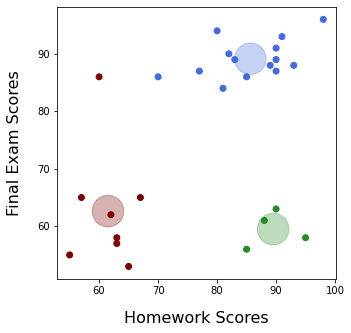

Process took 5 attemps of a possible 10 for 3 clusters.


([(85.64285714285714, 89.14285714285714), (89.5, 59.5), (61.5, 62.625)],
 [['Alice',
   'Charles',
   'Ellen',
   'Frita',
   'Grant',
   'Heidi',
   'Isabelle',
   'Jack',
   'Lisa',
   'Mary',
   'Quinton',
   'Violet',
   'Wally',
   'Xavier'],
  ['Orville', 'Peter', 'Yolanda', 'Zack'],
  ['Bob', 'Dave', 'Kate', 'Nancy', 'Ralph', 'Sally', 'Trent', 'Ursala']])

In [1]:
import math
import random
import matplotlib.pyplot as plt


def EuclidDist(point1, point2):
    distance = 0
    sum_of_dimensions = 0
    for idx in range(len(point1)):
        sum_of_dimensions += (point1[idx]-point2[idx])**2
    distance = math.sqrt(sum_of_dimensions)

    return distance


def FindClosestCentroid(point, centroid_list):
    distance_to_centroid = []
    for cluster_index in range(len(centroid_list)):
        distance = EuclidDist(point, centroid_list[cluster_index])
        distance_to_centroid.append(distance)

    min_distance = min(distance_to_centroid)
    closest_indx = distance_to_centroid.index(min_distance)
    min_centroid = centroid_list[closest_indx]
    # print("Point {} is closest to centroid #{} which is at location {}".format(point, closest_indx+1, min_centroid))

    return closest_indx


def InitEmptyClusters(k):
    clusters = []
    for i in range(k):
        clusters.append([])
    return clusters


def AssignItemsToClosestCluster(data_list, centroid_list):
    cluster_list = InitEmptyClusters(len(centroid_list))

    for key, data_point in data_list.items():
        closest_indx = FindClosestCentroid(data_point, centroid_list)
        cluster_list[closest_indx].append(key)

    return cluster_list


def ChooseRandomCentroids(data, k):

    centroids = []
    used_keys = []

    while len(centroids) < k:
        key = random.choice(list(data.keys()))
        if data[key] in centroids:
            used_keys.append(data[key])
        else:
            centroids.append(data[key])

    return centroids


def CaclulateCentroidLocation(data, cluster, dimension_count):
    centroid = [0] * dimension_count
    centroid = [0, 0]

    if len(cluster) > 0:
        for idx in range(dimension_count):
            centroid[idx] = sum(data[key][idx] for key in cluster)
            centroid[idx] /= len(cluster)

    return tuple(centroid)


def UpdateCentroidsKMeans(data, cluster_list):
    artibrary_cluster = cluster_list[0]
    arbitrary_key = artibrary_cluster[0]
    dimension_count = len(data[arbitrary_key])

    centroid_list = []
    for cluster in cluster_list:
        centroid_list.append(CaclulateCentroidLocation(
            data, cluster, dimension_count))

    return centroid_list


def PlotClusters2D(data, cluster_list, centroid_list, color_list, x_label=None, y_label=None, inches=5):

    plt.figure(figsize=(inches, inches))

    data_x = [data[key][0] for cluster in cluster_list for key in cluster]
    data_y = [data[key][1] for cluster in cluster_list for key in cluster]
    data_c = [color_list[i]
              for i, cluster in enumerate(cluster_list) for key in cluster]

    plt.scatter(data_x, data_y, c=data_c)

    centroids_x = [centroid[0] for centroid in centroid_list]
    centroids_y = [centroid[1] for centroid in centroid_list]
    centroids_c = color_list
    plt.scatter(centroids_x, centroids_y, c=color_list, s=1000, alpha=0.3)

    plt.xlabel(x_label, fontsize=16, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)

    plt.show()
    return


def CreateKMeansClusters(k, data, colors, x_label=None, y_label=None, show_debug=True):
    stable_clusters = False
    pass_count = 0

    prev_centroids = ChooseRandomCentroids(data, k)
    prev_clusters = AssignItemsToClosestCluster(data, prev_centroids)

    counter = 0

    max_passes = int(k*3.5)
    # notice that max_passes is now based on the k, instead of a hardcoded 10
    while stable_clusters == False and pass_count < max_passes:
        centroids = UpdateCentroidsKMeans(data, prev_clusters)
        clusters = AssignItemsToClosestCluster(data, centroids)

        if show_debug:
            PlotClusters2D(data, prev_clusters, prev_centroids,
                           colors, x_label, y_label)

        # this section wants the number of clusters to remain the same for a total of
        # k times. This would ensure the most accurate centroid, though not necessary.
        if prev_clusters == clusters:
            counter += 1
        if counter == k:
            stable_clusters = True
            PlotClusters2D(data, clusters, centroids, colors, x_label, y_label)

        prev_clusters = clusters
        prev_centroids = centroids
        pass_count += 1

    print("Process took {} attemps of a possible {} for {} clusters.".format(
        pass_count, max_passes, k))

    return (centroids, clusters)


colors = ["royalblue", "forestgreen", "maroon"]
student_grades = {"Alice": (93, 88), "Bob": (55, 55), "Charles": (90, 87), "Dave": (63, 57), "Ellen": (89, 88),
                  "Frita": (90, 91), "Grant": (70, 86), "Heidi": (98, 96), "Isabelle": (77, 87), "Jack": (80, 94),
                  "Kate": (60, 86), "Lisa": (85, 86), "Mary": (90, 89), "Nancy": (63, 58), "Orville": (88, 61),
                  "Peter": (95, 58), "Quinton": (83, 89), "Ralph": (57, 65), "Sally": (67, 65), "Trent": (62, 62),
                  "Ursala": (65, 53), "Violet": (82, 90), "Wally": (91, 93), "Xavier": (81, 84), "Yolanda": (90, 63),
                  "Zack": (85, 56)}


CreateKMeansClusters(3, student_grades, colors,
                     "Homework Scores", "Final Exam Scores", show_debug=False)
